In [1]:
import matplotlib.pyplot as plt
plt.style.use(['classic'])

import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
from astropy.io import fits

from scipy.stats import binned_statistic
from scipy.linalg import block_diag,eigh
plt.rcParams['font.family']='stixgeneral'
plt.rcParams.update({'font.size':16})
from astropy.io import fits

/Users/Jenny/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/Jenny/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/Jenny/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [5]:
fmp = fits.open('mjd-plate-pairs.fits')
fmp_sdss = fits.open('SDSS_CORE_UNIQUE_MJDPLATE.fits')

In [16]:
fmpsn = fits.open('sn_file.fits')

In [21]:
len(fmp[1].data)

18473

In [17]:
len(fmpsn[0].data)

4066

In [18]:
fmpsn[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional table                            
NAXIS1  =                  349 / width of table in bytes                        
NAXIS2  =                18473 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group                                 
TFIELDS =                   46 / number of columns                              
EXTNAME = 'Joined  '           / table name                                     
TTYPE1  = 'snMedian_g'         / label for column 1                             
TFORM1  = 'D       '           / format for column 1                            
TTYPE2  = 'z_1     '           / label for column 2                             
TFORM2  = 'D       '        

In [13]:
fmp_sdss[1].data[0]

(55234, 3751, 590, 21.09011, '552343751', 25.240033249934, 115.95099, 34.941603, -0.0004469365, 0.0001089969, 0.0, 0.0, 25.86889, 21.30428, 21.99404, 11, 29)

In [131]:
fmpsn[1].data['specObjID_1'], fmpsn[1].data['specObjID_2']

(array([4249379982626017280, 7915271616598396928, 8262047693377130496, ...,
        6911024421475209216, 7085323683087273984, 7084295914677096448]),
 array([4249379982626017280, 7915271616598396928, 8262047693377130496, ...,
        6911024421475209216, 7085323683087273984, 7084295914677096448]))

In [104]:
print (min(fmp[1].data['GroupSize']))

2


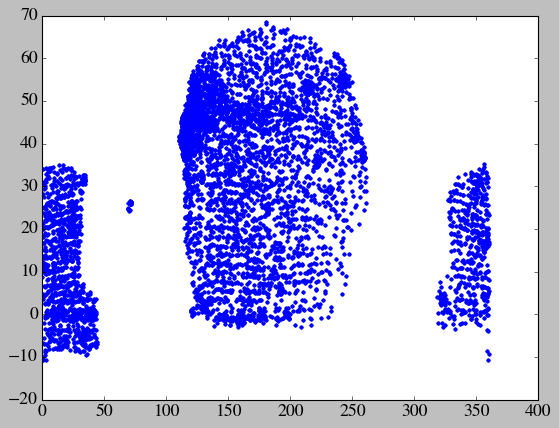

In [106]:
plt.plot(fmp[1].data['RA'],fmp[1].data['DEC'],'.')
plt.show()

In [100]:
snfmp = fmp[1].data['spectroFlux_g']/(1/np.sqrt(fmp[1].data['spectroFluxIvar_g']))

In [5]:
s3= []
for i in s1:
    s3.append('1'+i)

NameError: name 's1' is not defined

In [ ]:
np.array(index)

In [ ]:
print (len(fmp[1].data['groupid']))

In [102]:
s3

['11', '112', '13']

In [44]:
s = [[1,2,4],[1,2,4],[1,2,3]]

In [47]:
len(s)

3

In [4]:
vel = []
mjdplate = []
indexf= [] 
index = fmp[1].data['specObjID']
for ii in list(set(fmp[1].data['groupid'])): 
    vel1 = fmp[1].data['z'][fmp[1].data['groupid'] == ii]
    m1 = fmp[1].data['mjdplate'][fmp[1].data['groupid'] == ii]
    indexi = np.array(index)[fmp[1].data['groupid'] == ii]
    dia = []
    stest = []
    indexi1 = []
    for jj in range(0,len(vel1)):
        vi = np.repeat(vel1[jj],len(vel1))
        
        diff = vi - vel1
        s1 = []
        
        
        indexi2= []
        for kk in range(0,len(m1)):
            s1.append(str(m1[jj])+'-'+str(m1[kk]))
            indexi2.append(str(indexi[jj])+'-'+str(indexi[kk]))
            
            
        dia.append(diff)
        stest.append(s1)
        indexi1.append(indexi2)
        
    diaf = np.array(dia)[np.triu_indices(len(diff))]
    vel.append(diaf[np.nonzero(diaf)])
    mjdplate.append(np.array(stest)[np.triu_indices(len(diff))][np.nonzero(diaf)])  
    indexf.append(np.array(indexi1)[np.triu_indices(len(diff))][np.nonzero(diaf)])
    

In [7]:
np.concatenate(indexf)[0][:int(len(np.concatenate(indexf)[0])/2)]

'6529095315165040640'

In [7]:
fmp[1].data['specObjID']==int(np.concatenate(indexf)[0][:int(len(np.concatenate(indexf)[0])/2)])

array([ True, False, False, ..., False, False, False])

In [8]:
max(np.concatenate(indexf))

'8517707237652975616-8515411732268863488'

In [152]:
fmp[1].data['RA'][fmp[1].data['specObjID']==int(np.concatenate(indexf)[0][int(len(np.concatenate(indexf)[0])/2)+1:])]




array([149.55695])

In [153]:
int(np.concatenate(indexf)[0][int(len(np.concatenate(indexf)[ii])/2)+1:])

7282451545224138752

In [5]:
ra_1 = []
ra_2 = []
dec_1 =  []
dec_2 = [] 
sn_1 = []
sn_2 = [] 
mjdplatein = np.concatenate(mjdplate)
for ii in range(0,len(indexf)):
    sn_1.append(snfmp[fmp[1].data['specObjID']==int(np.concatenate(indexf)[ii][:int(len(np.concatenate(indexf)[ii])/2)])])
    sn_2.append(snfmp[fmp[1].data['specObjID']==int(np.concatenate(indexf)[ii][int(len(np.concatenate(indexf)[ii])/2)+1:])])
    ra_1.append(fmp[1].data['RA'][fmp[1].data['specObjID']==int(np.concatenate(indexf)[ii][:int(len(np.concatenate(indexf)[ii])/2)])])
    ra_2.append(fmp[1].data['RA'][fmp[1].data['specObjID']==int(np.concatenate(indexf)[ii][int(len(np.concatenate(indexf)[ii])/2)+1:])])
    dec_1.append(fmp[1].data['DEC'][fmp[1].data['specObjID']==int(np.concatenate(indexf)[ii][:int(len(np.concatenate(indexf)[ii])/2)])])
    dec_2.append(fmp[1].data['DEC'][fmp[1].data['specObjID']==int(np.concatenate(indexf)[ii][int(len(np.concatenate(indexf)[ii])/2)+1:])])
                

NameError: name 'snfmp' is not defined

In [6]:
mjdplateui = list(set(np.concatenate(mjdplate)))
veluni = np.concatenate(vel)
indexuni = np.concatenate(indexf)
mjdplateflat = np.concatenate(mjdplate)
indexfflat = np.concatenate(indexf)

In [7]:
mjdplatef = [] 
velff = []
numt = []
indexff = [] 
ra_1_f = []
ra_2_f = []
dec_1_f =  []
dec_2_f = [] 
sn_1_f = []
sn_2_f = [] 
#len(mjdplateui)
for ii in range(0,len(mjdplateui)):
    velff.append(veluni[mjdplateflat == mjdplateui[ii]])
    indextest = indexfflat[mjdplateflat == mjdplateui[ii]]
    ra_1 = []
    ra_2 = []
    dec_1 =  []
    dec_2 = [] 
    sn_1 = []
    sn_2 = [] 
    for jj in range(0,len(indextest)):
        ra_1.append(fmp[1].data['RA'][fmp[1].data['specObjID'] ==int(indextest[jj][:int(len(indextest[jj])/2)])])
        #print (ra_1)
        ra_2.append(fmp[1].data['RA'][fmp[1].data['specObjID'] ==int(indextest[jj][int(len(indextest[jj])/2)+1:])])
        
        dec_1.append(fmp[1].data['DEC'][fmp[1].data['specObjID'] ==int(indextest[jj][:int(len(indextest[jj])/2)])])
        #print (dec_1)
        dec_2.append(fmp[1].data['DEC'][fmp[1].data['specObjID'] ==int(indextest[jj][int(len(indextest[jj])/2)+1:])])
        sn_1.append(fmpsn[1].data['snMedian_g'][fmpsn[1].data['specObjID_1'] ==int(indextest[jj][:int(len(indextest[jj])/2)])])
        sn_2.append(fmpsn[1].data['snMedian_g'][fmpsn[1].data['specObjID_1'] ==int(indextest[jj][int(len(indextest[jj])/2)+1:])])
    ra_1_f.append(np.ravel(ra_1))
    ra_2_f.append(np.ravel(ra_2))
    dec_1_f.append(np.ravel(dec_1))
    dec_2_f.append(np.ravel(dec_2))
    sn_1_f.append(np.ravel(sn_1))
    sn_2_f.append(np.ravel(sn_2))
    
    mjdplatef.append(mjdplateui[ii])
    numt.append(len(veluni[mjdplateflat == mjdplateui[ii]]))
    indexff.append(indexfflat[mjdplateflat == mjdplateui[ii]])
    
    
    
    
    

In [ ]:
np.concatenate(ra_1_f)

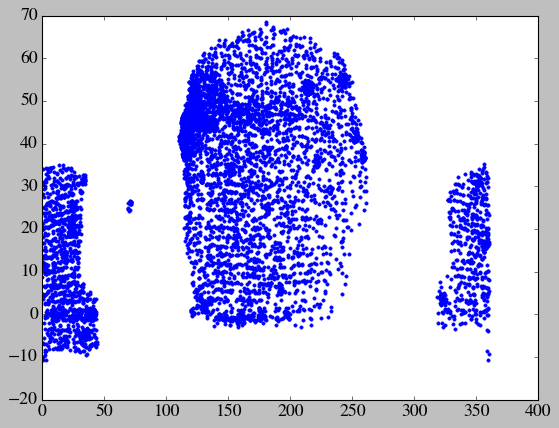

In [120]:
plt.plot(np.concatenate(ra_1_f),np.concatenate(dec_1_f),'.')
plt.show()

In [33]:
ra_1_f[1:2],ra_2_f[1:2]

([array([38.214664, 37.693903])], [array([38.214664, 37.693903])])

In [81]:
len(np.concatenate(sn_1_final))


158695

In [129]:
int(np.concatenate(indexff)[0][int(len(indexff[0][0])/2)+1:])

5929

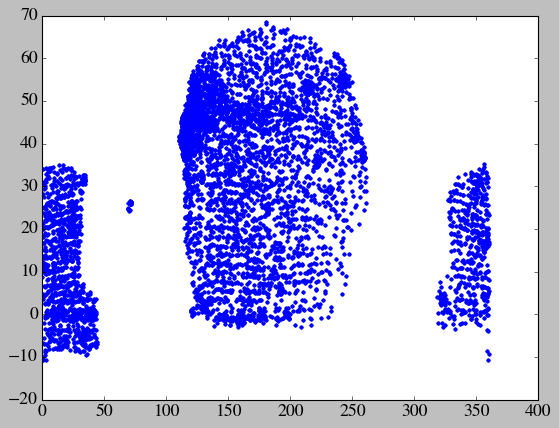

In [97]:
plt.plot(ra_1,fmp[1].data['DEC'],'.')
plt.show()

In [62]:
len(mjdplatef)

11833

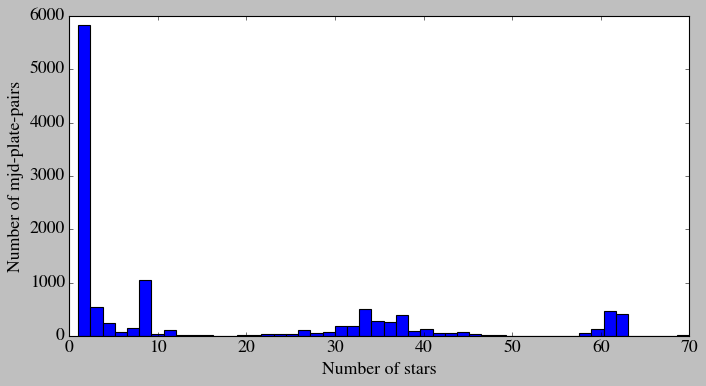

In [173]:
fig, ax = plt.subplots(figsize=(10,5))
ax.get_xaxis().get_major_formatter().set_scientific(False)
n_bins = 50
ax.hist(numt,bins=n_bins)
ax.set_ylabel('Number of mjd-plate-pairs')
ax.set_xlabel('Number of stars')
plt.savefig('test_number-pairs_hist.pdf')
#plt.xlim(19.8,20.0)
plt.show()

In [167]:
from astropy.table import Table

In [34]:
len(testvmaxdif)

5218

In [9]:
testvmaxdif = np.array(velff)[np.where(np.array(numt) > 5 )]
ra_1_final = np.array(ra_1_f)[np.where(np.array(numt) > 5 )]
ra_2_final = np.array(ra_2_f)[np.where(np.array(numt) > 5 )]
dec_1_final = np.array(dec_1_f)[np.where(np.array(numt) > 5 )]
dec_2_final = np.array(dec_2_f)[np.where(np.array(numt) > 5 )]
sn_1_final = np.array(sn_1_f)[np.where(np.array(numt) > 5 )]
sn_2_final = np.array(sn_2_f)[np.where(np.array(numt) > 5 )]

In [10]:
mean_val = []
sn_ave = []
sn_ave_2 = []
ra_1_fave = []
ra_2_fave = []
dec_1_fave = []
dec_2_fave = []
std = []
for ii in range(0,len(testvmaxdif)):
    mean_val.append(np.mean(testvmaxdif[ii]))
    sn_ave.append(np.mean(sn_1_final[ii]))
    sn_ave_2.append(np.mean(sn_2_final[ii]))
    ra_1_fave.append(np.mean(ra_1_final[ii]))
    ra_2_fave.append(np.mean(ra_2_final[ii]))
    dec_1_fave.append(np.mean(dec_1_final[ii]))
    dec_2_fave.append(np.mean(dec_2_final[ii]))
    
    


In [37]:
sn_com = []
sn_com_ave = [] 
for ii in range(0,len(np.concatenate(sn_1_final))):
    if np.concatenate(sn_1_final)[ii] < np.concatenate(sn_2_final)[ii]:
        sn_com.append(np.concatenate(sn_1_final)[ii])
        sn_com_ave.append(np.mean(np.concatenate(sn_1_final)[ii]))
    else:
        sn_com.append(np.concatenate(sn_2_final)[ii])
        sn_com_ave.append(np.mean(np.concatenate(sn_2_final)[ii]))

In [41]:

for kk in range(0,len(testvmaxdi)):
    

stdtest= np.std(testvmaxdif)

ValueError: operands could not be broadcast together with shapes (61,) (62,) 

In [40]:
len(sn_com_ave)

171059

In [12]:
diff = testvmaxdif - mean_val

In [44]:
np.min(sn_com)

2.863563

In [49]:
std = [] 
step = 1 
n = 0 
sn_app = []
while np.min(sn_com)+n+step < np.max(sn_com):
    
    std.append(np.std(np.concatenate(diff)[(sn_com < np.min(sn_com)+n+step)& (sn_com > np.min(sn_com)+n)]*3*100000))
    n=n+1
    sn_app.append(np.mean(np.array(sn_com)[(sn_com < np.min(sn_com)+n+step)& (sn_com > np.min(sn_com)+n)]))
    

/Users/Jenny/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


In [59]:
veloffset_sn_cut = [] 

n= 0 
sn_cut = []
for kk in np.arange(np.min(sn_com),np.max(sn_com),(np.max(sn_com)-np.min(sn_com))/10):
    step = kk
#while np.min(sn_com)+n+step < np.max(sn_com):
    print (n,step)
    veloffset_sn_cut.append(np.concatenate(diff)[(sn_com < np.min(sn_com)+step)& (sn_com > np.min(sn_com)+n)]*3*100000)
    
    sn_cut.append(np.mean(np.array(sn_com)[(sn_com < np.min(sn_com)+step)& (sn_com > np.min(sn_com)+n)]))
    n = step
  

0 2.863563
2.863563 12.156803700000001
12.156803700000001 21.450044400000003
21.450044400000003 30.743285100000005
30.743285100000005 40.03652580000001
40.03652580000001 49.329766500000005
49.329766500000005 58.62300720000001
58.62300720000001 67.91624790000002
67.91624790000002 77.20948860000001
77.20948860000001 86.50272930000001


In [61]:
 veloffset_sn_cut

[array([ 24.9053826, -32.6718024, -14.193075 ]),
 array([-28.22936412, -10.29912533, -20.5964095 , -17.71084697,
        -21.72712227, -14.98789282,  22.93195118,  -7.44502282,
        -24.35815488, -13.87212664,  12.10386789,  -4.12475211,
          9.51161308,  29.71085308, -16.11054692, -24.5505906 ,
        -24.81667291, -18.91445432,  27.18745318, -28.76612532,
          3.291515  ,   8.61301928,  20.40765064, -14.75671214,
          1.3900574 ,  -3.1196926 , -12.63135637, -25.04785923,
        -20.88488971, -21.04170403,  24.29129838, -18.88904889,
        -22.54004464,  41.13763526,  -7.30583485,  16.50420492,
          7.958805  ,  -5.466051  ,  12.0258219 , -24.48305792,
        -21.19325885, -25.71946279, -18.35229409, -19.02375866,
        -18.3811212 , -26.87014326, -19.0334589 ,  21.81572575,
         -8.56513927,  39.30198654, -21.38838867,  10.94663853,
        -15.14555327,  27.99071403, -18.71522182,  18.57864984,
        -22.4319558 , -16.5981722 ,  28.02882601,  30.4

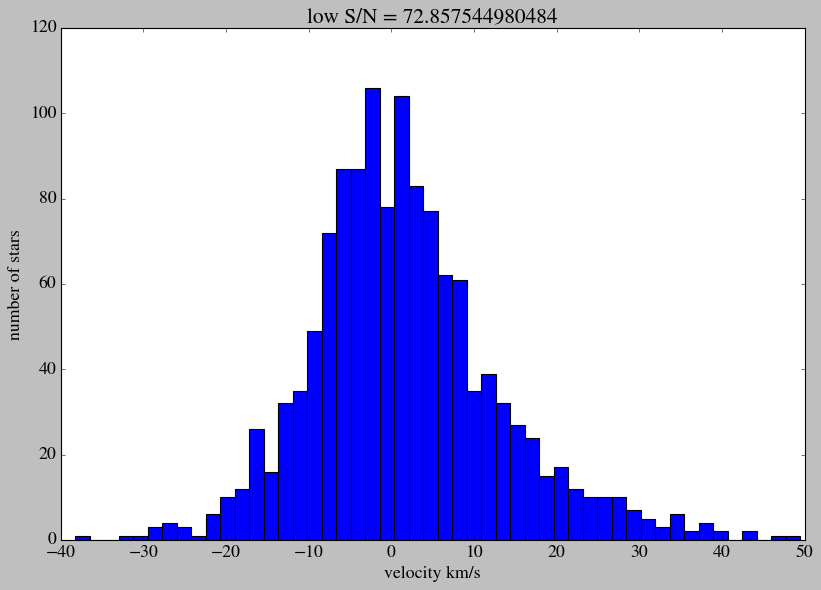

In [72]:
fig, ax = plt.subplots(figsize=(12,8))
plt.hist(veloffset_sn_cut[8], bins=50)
plt.title('low S/N = '+str(sn_cut[8]))
plt.xlabel('velocity km/s')
plt.ylabel('number of stars')
plt.show()

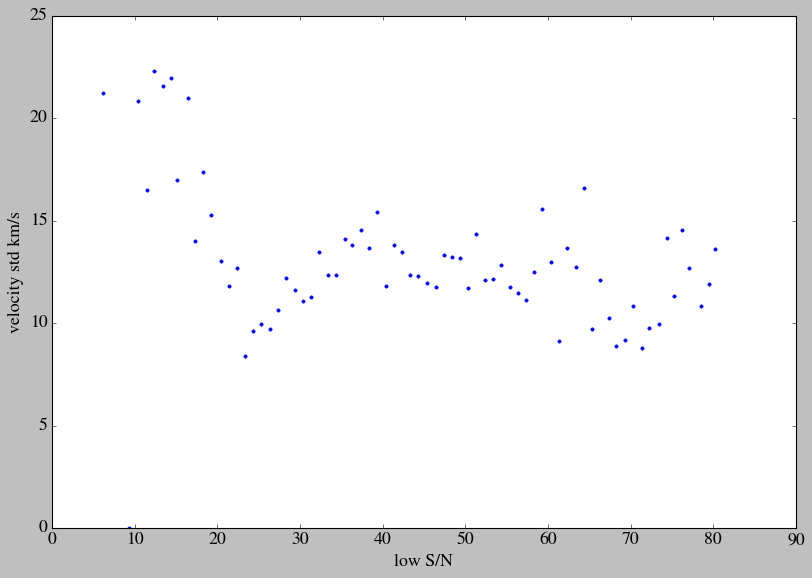

In [56]:
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(sn_app, std,'.')

plt.ylabel('velocity std km/s')
plt.xlabel('low S/N')
plt.show()

In [ ]:
matplotlib.pyplot.hist2d(x, y, bins=10,

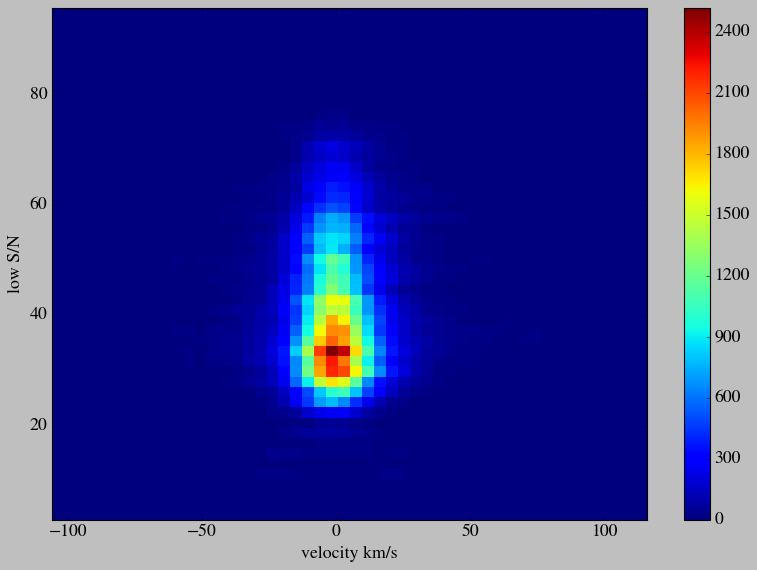

In [148]:
fig, ax = plt.subplots(figsize=(12,8))
plt.hist2d(np.concatenate(diff)*3*100000,sn_com, bins=50)
plt.colorbar()
plt.xlabel('velocity km/s')
plt.ylabel('low S/N')
plt.show()

In [95]:
len(np.concatenate(ra_1_final))

158695

mean_val

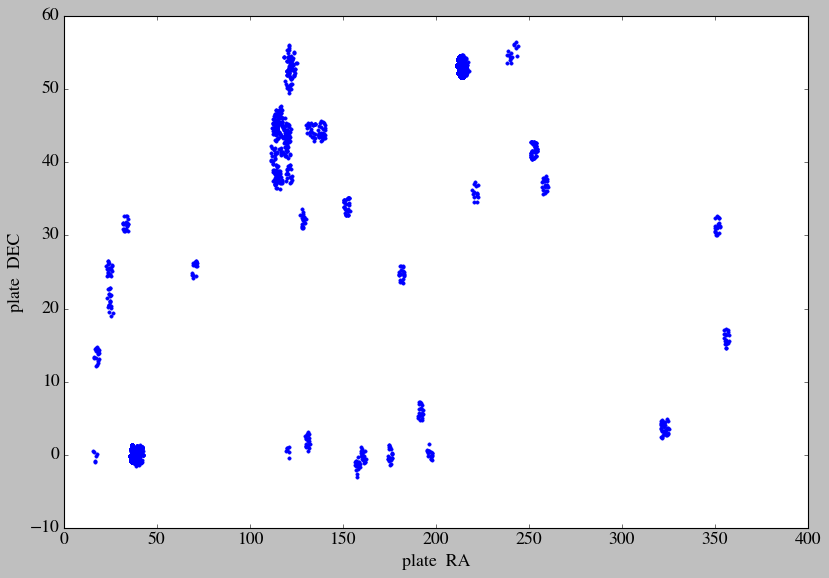

In [143]:
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(np.concatenate(ra_1_final),np.concatenate(dec_1_final),'.')
plt.xlabel('plate  RA')
plt.ylabel('plate  DEC')
plt.show()

In [13]:
testvmaxdif[0]

IndexError: index 0 is out of bounds for axis 0 with size 0

In [198]:
print (len(mean_val))

3910


In [43]:
ra_1_f

[array([213.33471, 212.48205, 213.44588, 212.79453, 213.62579, 212.48786,
        211.9104 , 213.38754, 214.37881, 212.80102, 212.9472 , 214.3484 ,
        211.37224, 211.49691, 215.29619, 212.51069, 215.84176, 212.37591,
        214.26816, 216.04791, 213.98584, 214.81364, 211.63514, 211.73651,
        213.69357, 214.3025 , 214.79577, 216.03244, 212.15717, 215.78839,
        212.79619, 213.74687, 214.45677, 213.55739]),
 array([38.214664, 37.693903]),
 array([6.049135]),
 array([342.57472]),
 array([135.80221]),
 array([213.38754, 214.26816, 216.04791, 213.98584, 214.81364, 213.74687,
        214.45677, 213.55739]),
 array([212.4642 , 213.44588, 213.69461, 212.79453, 213.62579, 211.9104 ,
        212.74181, 212.80102, 212.90262, 212.9472 , 214.26516, 214.3484 ,
        214.70213, 211.37224, 211.47033, 211.49691, 212.61122, 215.29619,
        213.98584, 214.13061, 214.81364, 211.73651, 214.29668, 216.03244,
        212.15717, 215.65241, 215.78839, 214.20272]),
 array([213.14218]),
 arra

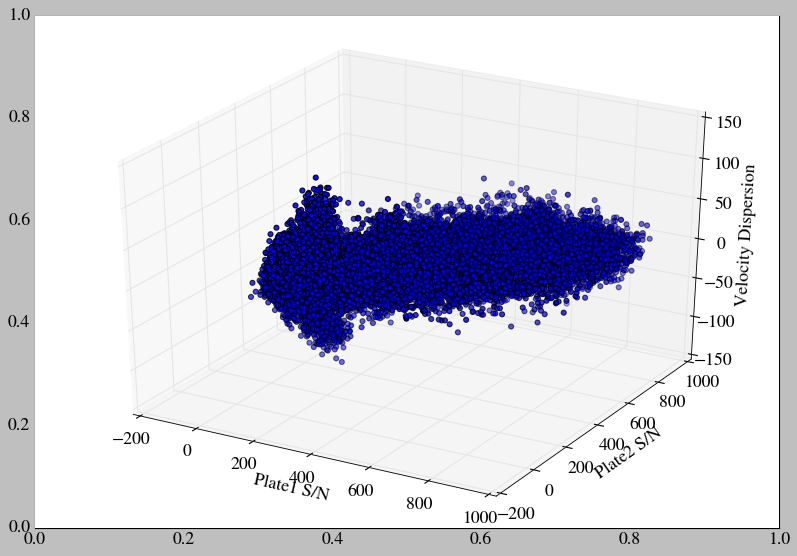

In [250]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig, ax = plt.subplots(figsize=(12,8))
ax.ticklabel_format(axis='both', style='', scilimits=(300,500), useOffset=None, useLocale=None, useMathText=None)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(mean_val*3*100000,np.concatenate(sn_ave)/np.concatenate(sn_ave_2))
ax.set_xlabel('Plate1 S/N')
ax.set_ylabel('Plate2 S/N')
ax.set_zlabel('Velocity Dispersion')
plt.show()


In [28]:
ratio = np.array(sn_ave)/np.array(sn_ave_2)

In [43]:
np.array(ratio)

array([0.99842167, 1.1313464 , 0.96688422, ..., 1.44213474, 1.2706787 ,
       0.73286861])

In [15]:
plt.plot(mean_val,ratio,'.')
plt.xlabel('mean velocity offset')
plt.ylabel('S/N ratio between two plates')
plt.show()

NameError: name 'ratio' is not defined

In [21]:
mean_val

[-4.8358505588235286e-05,
 -1.5795581999999996e-05,
 -3.22423835409836e-05,
 -2.6730663409836065e-05,
 1.8838002030303028e-05,
 9.609488611111118e-06,
 4.1996824434782605e-05,
 -5.868415777777778e-05,
 1.3424921106382976e-05,
 -3.06574685483871e-05,
 4.909490472222227e-06,
 -2.722367967741935e-05,
 1.2082553783783774e-05,
 2.363451071428566e-06,
 -2.2661572195121964e-05,
 1.0839587894736852e-05,
 -2.7669621403225797e-05,
 -1.2623155405405403e-05,
 7.0962149180327844e-06,
 -7.525707499999995e-06,
 2.021044905714285e-05,
 1.333536514285713e-06,
 1.3691037213114753e-05,
 -3.0426886468750012e-05,
 1.2552896721311475e-06,
 -3.708084129999999e-05,
 -7.182153846154658e-08,
 -9.764293243902439e-06,
 1.9028113333333327e-05,
 2.3942955454545467e-05,
 -8.271709978723405e-06,
 -3.768538269230769e-05,
 1.16656585e-05,
 2.3621545638888875e-05,
 9.582806206896555e-06,
 -4.6862711166666625e-06,
 5.046201135135134e-05,
 -3.2891099473684214e-05,
 5.209370769230761e-06,
 1.237688363636363e-05,
 -4.496885

In [140]:
veloff = np.array(mean_val)*3*100000

In [141]:
print (np.array(veloff[1:100]))

[-6.44139788e+00 -4.73867460e+00 -2.54133938e+00 -1.32881528e+01
 -9.67271506e+00 -8.01919902e+00  5.65140061e+00 -3.29129800e+00
 -4.27227772e+00  2.88284658e+00  1.25990473e+01 -1.03842709e+01
 -1.76052473e+01 -6.33426487e+00 -2.62873838e+00 -3.66901388e+00
  4.02747633e+00 -9.19724056e+00 -1.61906227e+00  1.47284714e+00
 -8.16710390e+00  3.62476614e+00  7.09035321e-01  6.89886716e+00
 -6.79847166e+00 -1.01893115e+01  3.25187637e+00 -9.50402213e+00
 -8.30088642e+00 -3.78694662e+00  2.12886448e+00 -2.25771225e+00
  6.06313472e+00  4.00060954e-01 -1.29960300e+00 -2.98386442e+00
  4.10731116e+00 -9.12806594e+00  3.76586902e-01 -1.43395196e+01
 -4.22131745e+00 -1.11242524e+01 -2.15464615e-02 -2.92928797e+00
  5.70843400e+00  7.18288664e+00  2.71926836e+01 -2.48151299e+00
 -1.13056148e+01  3.49969755e+00  7.08646369e+00  2.87484186e+00
  3.57884571e-01 -1.40588133e+00  1.51386034e+01 -9.86732984e+00
  1.56281123e+00  3.71306509e+00 -1.34906556e+01  3.42878120e+00
  6.71532000e+00  9.33504

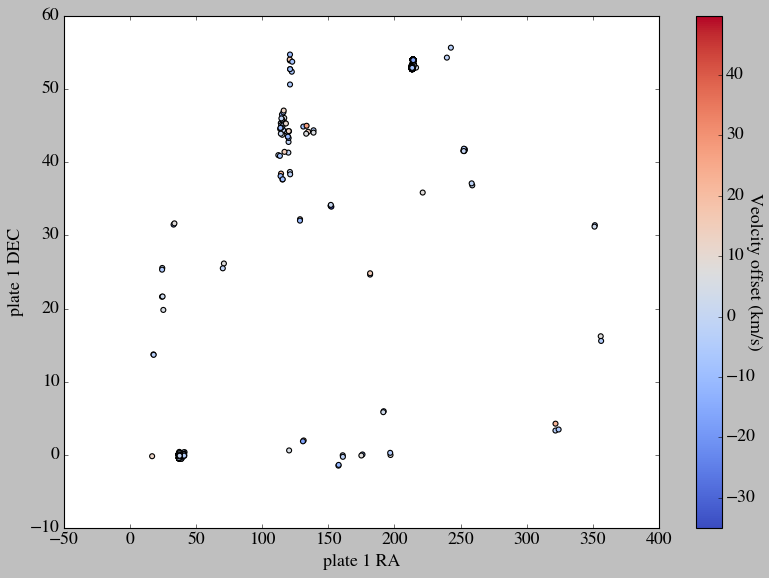

In [150]:
from matplotlib.cm import coolwarm
fig, ax = plt.subplots(figsize=(12,8))
k = ax.scatter(ra_1_fave, dec_1_fave, c=np.array(veloff),cmap=coolwarm)
ax.set_xlabel('plate 1 RA')
ax.set_ylabel('plate 1 DEC')
c = plt.colorbar(k)
c.ax.set_ylabel('Veolcity offset (km/s)',Rotation = 270)
plt.show()

In [32]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig, ax = plt.subplots(figsize=(12,8))
#ax.ticklabel_format(axis='both', style='', scilimits=(300,500), useOffset=None, useLocale=None, useMathText=None)
#ax = fig.add_subplot(111, projection='3d')
ax.scatter(mean_val*3*100000,ratio)
ax.set_xlabel('velocity offset')
ax.set_ylabel('Plate S/N ratio')

plt.show()

ValueError: zero-dimensional arrays cannot be concatenated

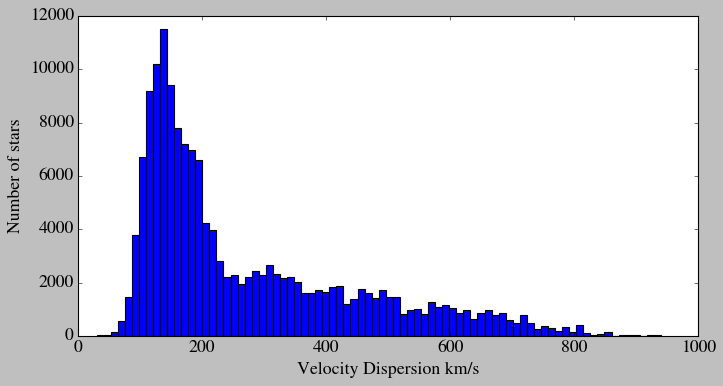

In [255]:
fig, ax = plt.subplots(figsize=(10,5))
ax.get_xaxis().get_major_formatter().set_scientific(False)
n_bins = 80
ax.hist(np.concatenate((sn_2_final)),bins=n_bins)
ax.set_ylabel('Number of stars')
ax.set_xlabel('Velocity Dispersion km/s')
#plt.xlim(-50,50.0)
plt.show()

In [14]:
mjdplate_sdss = [] 
vel_sdss = []
numt_sdss = []
for ii in range(0,len()):
    vel_sdss.append(veluni[mjdplateflat == fmp_sdss[1].data['mjdplate'][ii]])
    
    mjdplate_sdss.append(fmp_sdss[1].data['mjdplate'][ii])
    numt_sdss.append(len(veluni[mjdplateflat == fmp_sdss[1].data['mjdplate'][ii]]))


In [18]:
len(list(set(fmp_sdss[1].data['mjdplate'])))

2190

In [73]:
mjdplate_sdss = fmp_sdss[1].data['mjdplate'].reshape((int(len(fmp_sdss[1].data['mjdplate'])/10)),10)

In [74]:
print (len(mjdplate_sdss[1]))

10


In [70]:
mjdplate_sdss = [[1,2,3,4],[2,2,3,4],[1,2,3,4],[1,2,3,4],[1,2,3,4],[1,2,3,4]]

In [75]:
vel_sdss = []

s_sdss = []
for ii in range(0,len(mjdplate_sdss)): 
    
   
    s_sdssi = []
    
    for jj in range(0,len(mjdplate_sdss[ii])):
        s1_sdss = []
        for kk in range(0,len(mjdplate_sdss[ii])):
            if (jj!=kk):
            
                 s1_sdss.append(str(mjdplate_sdss[ii][jj])+'-'+str(mjdplate_sdss[ii][kk]))
        s_sdssi.append(s1_sdss)
     
    s_sdss.append(np.array(s_sdssi)[np.triu_indices(len(mjdplate_sdss[ii])-1)])
    
    

In [78]:
len(s_sdss[1])

45

In [61]:
print (len(np.concatenate(s_sdss)))

238710


In [38]:
s_sdss

[]

In [26]:
len(s_sdss)

184593

In [152]:
print (len(velff[10]))

31


In [111]:
print (mjdplate)

[array(['563255799-563116468'], dtype='<U19'), array(['562725803-563255808'], dtype='<U19')]


In [107]:
vel

[array([ 0.000000e+00, -6.009124e-05,  0.000000e+00]),
 array([0.000e+00, 2.688e-07, 0.000e+00])]

In [75]:
velf = np.concatenate(vel)

In [79]:
print (len(velf[np.nonzero(velf)]))

181070


In [76]:
print (np.mean(np.absolute(velf[np.nonzero(velf)])))

3.8317436741447504e-05


In [73]:
xrange(0,1)

NameError: name 'xrange' is not defined